In [1]:
import numpy as np

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')
ran = np.random.randint(0, len(X), size=3)
X_ran = np.array([X[idx] for idx in ran])
Y_ran = np.array([Y[idx] for idx in ran])
X = np.vstack((X, X_ran))
Y = np.vstack((Y.reshape(len(Y), 1), Y_ran.reshape(len(Y_ran), 1)))
Y = Y.reshape(len(Y), )
print(X.shape)
print(Y.shape)

(5550, 50, 50, 3)
(5550,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[:20])

(4440,)
(1110,)
[1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0]


In [4]:
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', Y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train.min(),
                        Y_train.mean(), Y_train.std(), Y_train.max()))

Image dataset have shape = (4440, 50, 50, 3)
Image dataset has min/mean/std/max = 2.00/185.11/47.22/255.00

Train label has shape = (4440,)
Training label has min/mean/std/max = 0.00/0.50/0.50/1.00


In [5]:
# function to normalize data
def normalize_data(data): 
    data = data / data.max()
    return data

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', Y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train.min(),
                        Y_train.mean(), Y_train.std(), Y_train.max()))

Image dataset have shape = (4440, 50, 50, 3)
Image dataset has min/mean/std/max = 0.01/0.73/0.19/1.00

Train label has shape = (4440,)
Training label has min/mean/std/max = 0.00/0.50/0.50/1.00


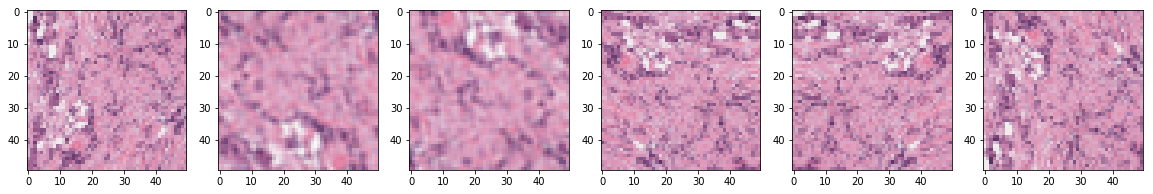

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
def transpose_3D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = X[:,:,i].T
        toReturn[:,:,i] = temp
    return toReturn

def inverse_3D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = np.linalg.inv(X[:,:,i])
        toReturn[:,:,i] = temp
    return toReturn

def rotate_in_3D(X):
    from scipy import ndimage, misc
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = ndimage.zoom(X[:,:,i], 1.5)
        temp = ndimage.rotate(temp, 60, reshape=False)
        length = temp.shape[0]
        temp = temp[15:65, 15:65]
        toReturn[:,:,i] = temp
    return toReturn

    
fig,axs = plt.subplots(1,6, figsize=(20,20))
n = np.random.randint(0,X_train.shape[0]-2)
transpose_3D(X_train[n])
axs[0].imshow(X_train[n])
axs[1].imshow(rotate_in_3D(X_train[n]))
axs[2].imshow(np.rot90(rotate_in_3D(X_train[n]), 2))
axs[3].imshow(np.rot90(X_train[n], 3))
axs[4].imshow(transpose_3D(X_train[n]))
axs[5].imshow(np.rot90(transpose_3D(X_train[n]), 1))

# Different types of ml algo for refer (Not deep learning)

In [7]:
X_trainFlat = [x.flatten() for x in X_train]
X_testFlat = [x.flatten() for x in X_test]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(random_state=0)
cls.fit(X_trainFlat, Y_train)
#print(cls)
pred = cls.predict(X_testFlat)
pred = cls.predict(X_testFlat)
correct = 0
for x in range(len(pred)):
    if pred[x] == Y_test[x]:
        correct+=1
percentage = correct/len(Y_test)
print("Decision Tree accuracy: " + str(percentage))
print()

cls = RandomForestClassifier()
cls.fit(X_trainFlat, Y_train)
#print(cls)
pred = cls.predict(X_testFlat)
pred = cls.predict(X_testFlat)
correct = 0
for x in range(len(pred)):
    if pred[x] == Y_test[x]:
        correct+=1
percentage = correct/len(Y_test)
print("Random Forest accuracy: " + str(percentage))
print()

cls = AdaBoostClassifier()
cls.fit(X_trainFlat, Y_train)
#print(cls)
pred = cls.predict(X_testFlat)
pred = cls.predict(X_testFlat)
correct = 0
for x in range(len(pred)):
    if pred[x] == Y_test[x]:
        correct+=1
percentage = correct/len(Y_test)
print("Ada Boost accuracy: " + str(percentage))
print()

cls = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
cls.fit(X_trainFlat, Y_train)
#print(cls)
pred = cls.predict(X_testFlat)
correct = 0
for x in range(len(pred)):
    if pred[x] == Y_test[x]:
        correct+=1
percentage = correct/len(Y_test)
print("SGD Classifier accuracy: " + str(percentage))
print()

cls = LogisticRegression()
cls.fit(X_trainFlat, Y_train)
#print(cls)
pred = cls.predict(X_testFlat)
correct = 0
for x in range(len(pred)):
    if pred[x] == Y_test[x]:
        correct+=1
percentage = correct/len(Y_test)
print("Logistic Regression accuracy: " + str(percentage))

Decision Tree accuracy: 0.6720720720720721



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest accuracy: 0.7414414414414414

Ada Boost accuracy: 0.763063063063063

SGD Classifier accuracy: 0.7171171171171171



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 0.690990990990991


In [13]:
cls = AdaBoostClassifier()
cls.fit(X_trainFlat, Y_train)
proba = cls.predict_proba(X_trainFlat)
print(proba.shape)
positive = []
negative = []
positive.clear()
negative.clear()
for i in range(proba.shape[0]):
    if proba[i][0] >= 0.60 and proba[i][0] <= 0.85:
        positive.append(i)
    elif proba[i][1] >= 0.60 and proba[i][1] <= 0.85:
        negative.append(i)

print(len(positive))
print(len(negative))

(4440, 2)
0
0


In [ ]:
def augment(X, Y):
    length = len(X)
    Y_r = []
    X_r = []
    for i in range(length):
        if((i+1)%2501 == 0):
            print("Half way there!")
        if (i in negative) or (i in positive):
            #1
            X_r.append(X[i])
            Y_r.append(Y[i])
            #2
            X_r.append(rotate_in_3D(X[i]))
            Y_r.append(Y[i])
            #3
            X_r.append(np.rot90(rotate_in_3D(X[i]), 1))
            Y_r.append(Y[i])
            #4
            X_r.append(np.rot90(rotate_in_3D(X[i]), 2))
            Y_r.append(Y[i])
            #5
            X_r.append(np.rot90(rotate_in_3D(X[i]), 1))
            Y_r.append(Y[i])
            #6
            X_r.append(np.rot90(rotate_in_3D(X[i]), 2))
            Y_r.append(Y[i])
            #7
            X_r.append(np.rot90(X[i], 3))
            Y_r.append(Y[i])
            #8
            X_r.append(transpose_3D(X[i]))
            Y_r.append(Y[i])
            #9
            X_r.append(np.rot90(transpose_3D(X[i]), 1))
            Y_r.append(Y[i])
            #10
            X_r.append(np.rot90(transpose_3D(X[i]), 2))
            Y_r.append(Y[i])
            #11
            X_r.append(np.rot90(transpose_3D(X[i]), 3))
            Y_r.append(Y[i])
        else:
            #1
            X_r.append(X[i])
            Y_r.append(Y[i])
            #2
            X_r.append(rotate_in_3D(X[i]))
            Y_r.append(Y[i])
            #3
            X_r.append(np.rot90(rotate_in_3D(X[i]), 2))
            Y_r.append(Y[i])
            #4
            X_r.append(np.rot90(X[i], 3))
            Y_r.append(Y[i])
            #5
            X_r.append(transpose_3D(X[i]))
            Y_r.append(Y[i])
            #6
            X_r.append(np.rot90(transpose_3D(X[i]), 1))
            Y_r.append(Y[i])
    X_return = np.asarray(X_r)
    Y_return = np.asarray(Y_r)    
    return X_return, Y_return

print(X_train.shape)
print(Y_train.shape)
X_train, Y_train = augment(X_train, Y_train)    
print(X_train.shape)
print(Y_train.shape)

In [ ]:
Y_train = Y_train.astype(int)
print(Y_train[:20])
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)
print(X_train.shape)
print(Y_train.shape)

In [ ]:
plt.figure(figsize=(20,20))
class_labels = ['Positive', 'Negative']
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_labels[Y_train[i]])
    plt.imshow(X_train[i])

# Neural Nets Alg

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:
# Show images.
rows = 2
columns = 2
fig=plt.figure()
for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    plt.title(classes[labels[i]])
    img = images[i] / 2 + 0.5     # this is for unnormalize the image
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

# AlexNet Attempt

In [ ]:
class Net(nn.Module):

    def __init__(self, num_classes=2):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x
    
net = Net()
net.to(device)

In [ ]:
torch.cuda.is_available() 

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
opt = torch.optim.Adam(net.parameters(), lr=0.0005) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
avg_losses = [] # Avg. losses.
epochs = 500 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# ResNet 18

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:
num_classes = 2
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.downsample = nn.Sequential()
        
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.downsample(x)
        out = F.relu(out)
        return out

class ResNetLayer(nn.Module):
    def __init__(self, block, n_blocks, in_channels, out_channels, stride):
        super().__init__()
        
        self.modules = []
        
        self.modules.append(block(in_channels, out_channels, stride))
        
        for _ in range(n_blocks-1):
            self.modules.append(block(out_channels, out_channels, 1))
            
        self.blocks = nn.Sequential(*self.modules)
    
    def forward(self, x):
        return self.blocks(x) 
    
class ResNet18(nn.Module):
    def __init__(self, layer, block):
        super().__init__()
        
        n_blocks = [2, 2, 2, 2]
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = layer(block, n_blocks[0], 64, 64, 1)
        self.layer2 = layer(block, n_blocks[1], 64, 128, 2)
        self.layer3 = layer(block, n_blocks[2], 128, 256, 2)
        self.layer4 = layer(block, n_blocks[3], 256, 512, 2)
        self.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out
net = ResNet18(ResNetLayer, ResNetBlock).to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# MobileNet

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:


class DepthSeperabelConv2d(nn.Module):

    def __init__(self, input_channels, output_channels, kernel_size, **kwargs):
        super().__init__()
        self.depthwise = nn.Sequential(
            nn.Conv2d(
                input_channels,
                input_channels,
                kernel_size,
                groups=input_channels,
                **kwargs),
            nn.BatchNorm2d(input_channels),
            nn.ReLU(inplace=True)
        )

        self.pointwise = nn.Sequential(
            nn.Conv2d(input_channels, output_channels, 1),
            nn.BatchNorm2d(output_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)

        return x


class BasicConv2d(nn.Module):

    def __init__(self, input_channels, output_channels, kernel_size, **kwargs):

        super().__init__()
        self.conv = nn.Conv2d(
            input_channels, output_channels, kernel_size, **kwargs)
        self.bn = nn.BatchNorm2d(output_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)

        return x


class MobileNet(nn.Module):

    """
    Args:
        width multipler: The role of the width multiplier α is to thin 
                         a network uniformly at each layer. For a given 
                         layer and width multiplier α, the number of 
                         input channels M becomes αM and the number of 
                         output channels N becomes αN.
    """

    def __init__(self, width_multiplier=1, class_num=100):
        super().__init__()

        alpha = width_multiplier
        self.stem = nn.Sequential(
        BasicConv2d(3, int(32 * alpha), 3, padding=1, bias=False), DepthSeperabelConv2d( int(32 * alpha), int(64 * alpha),3, padding=1,bias=False))

        #downsample
        self.conv1 = nn.Sequential(
           DepthSeperabelConv2d(
               int(64 * alpha),
               int(128 * alpha),
               3,
               stride=2,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(128 * alpha),
               int(128 * alpha),
               3,
               padding=1,
               bias=False
           )
        )

        #downsample
        self.conv2 = nn.Sequential(
           DepthSeperabelConv2d(
               int(128 * alpha),
               int(256 * alpha),
               3,
               stride=2,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(256 * alpha),
               int(256 * alpha),
               3,
               padding=1,
               bias=False
           )
        )

        #downsample
        self.conv3 = nn.Sequential(
           DepthSeperabelConv2d(
               int(256 * alpha),
               int(512 * alpha),
               3,
               stride=2,
               padding=1,
               bias=False
           ),

           DepthSeperabelConv2d(
               int(512 * alpha),
               int(512 * alpha),
               3,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(512 * alpha),
               int(512 * alpha),
               3,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(512 * alpha),
               int(512 * alpha),
               3,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(512 * alpha),
               int(512 * alpha),
               3,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(512 * alpha),
               int(512 * alpha),
               3,
               padding=1,
               bias=False
           )
        )

        #downsample
        self.conv4 = nn.Sequential(
           DepthSeperabelConv2d(
               int(512 * alpha),
               int(1024 * alpha),
               3,
               stride=2,
               padding=1,
               bias=False
           ),
           DepthSeperabelConv2d(
               int(1024 * alpha),
               int(1024 * alpha),
               3,
               padding=1,
               bias=False
           )
        )

        self.fc = nn.Linear(int(1024 * alpha), class_num)
        self.avg = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        x = self.stem(x)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)

        x = self.avg(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


def mobilenet(alpha=1, class_num=100):
    return MobileNet(alpha, class_num)
  
net = mobilenet(1,2)
net.to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# ResNext

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
# if torch.cuda.is_available():
#     device = torch.device("cuda:0")
# else:
device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:
CARDINALITY = 32
DEPTH = 4
BASEWIDTH = 64

class ResNextBottleNeckC(nn.Module):

    def __init__(self, in_channels, out_channels, stride):
        super().__init__()

        C = CARDINALITY #How many groups a feature map was splitted into

        #"""We note that the input/output width of the template is fixed as 
        #256-d (Fig. 3), We note that the input/output width of the template 
        #is fixed as 256-d (Fig. 3), and all widths are dou- bled each time 
        #when the feature map is subsampled (see Table 1)."""
        D = int(DEPTH * out_channels / BASEWIDTH) #number of channels per group
        self.split_transforms = nn.Sequential(
            nn.Conv2d(in_channels, C * D, kernel_size=1, groups=C, bias=False),
            nn.BatchNorm2d(C * D),
            nn.ReLU(inplace=True),
            nn.Conv2d(C * D, C * D, kernel_size=3, stride=stride, groups=C, padding=1, bias=False),
            nn.BatchNorm2d(C * D),
            nn.ReLU(inplace=True),
            nn.Conv2d(C * D, out_channels * 4, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels * 4),
        )

        self.shortcut = nn.Sequential()

        if stride != 1 or in_channels != out_channels * 4:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * 4, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * 4)
            )

    def forward(self, x):
        return F.relu(self.split_transforms(x) + self.shortcut(x))

class ResNext(nn.Module):

    def __init__(self, block, num_blocks, class_names=100):
        super().__init__()
        self.in_channels = 64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        self.conv2 = self._make_layer(block, num_blocks[0], 64, 1)
        self.conv3 = self._make_layer(block, num_blocks[1], 128, 2)
        self.conv4 = self._make_layer(block, num_blocks[2], 256, 2)
        self.conv5 = self._make_layer(block, num_blocks[3], 512, 2)
        self.avg = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * 4, 100)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.avg(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
        
    def _make_layer(self, block, num_block, out_channels, stride):
        """Building resnext block
        Args:
            block: block type(default resnext bottleneck c)
            num_block: number of blocks per layer
            out_channels: output channels per block
            stride: block stride
        
        Returns:
            a resnext layer
        """
        strides = [stride] + [1] * (num_block - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * 4

        return nn.Sequential(*layers)

net = ResNext(ResNextBottleNeckC, [3, 4, 6, 3])
net.to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 1 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# VGG 11

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:
cfg = {
    'A' : [64,     'M', 128,      'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M'],
    'B' : [64, 64, 'M', 128, 128, 'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M']
}

class VGG(nn.Module):

    def __init__(self, features, num_class=100):
        super().__init__()
        self.features = features

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_class)
        )

    def forward(self, x):
        output = self.features(x)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
    
        return output

def make_layers(cfg, batch_norm=False):
    layers = []

    input_channel = 3
    for l in cfg:
        if l == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            continue

        layers += [nn.Conv2d(input_channel, l, kernel_size=3, padding=1)]

        if batch_norm:
            layers += [nn.BatchNorm2d(l)]
        
        layers += [nn.ReLU(inplace=True)]
        input_channel = l
    
    return nn.Sequential(*layers)

net = VGG(make_layers(cfg['A'], batch_norm=True))
net.to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# VGG 13

In [ ]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

In [ ]:
net = VGG(make_layers(cfg['B'], batch_norm=True))
net.to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))